___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
***

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sqlalchemy import create_engine
import warnings
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

#### Load Dataset

In [2]:
data = pd.read_csv("Mall_Customers.csv")
df = data.copy()
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df.head().T

,0,1,2,3,4
CustomerID,1,2,3,4,5
Gender,Male,Male,Female,Female,Female
Age,19,21,20,23,31
Annual Income (k$),15,15,16,16,17
Spending Score (1-100),39,81,6,77,40


In [4]:
df.shape

(200, 5)

In [5]:
df.sample().T

,28
CustomerID,29
Gender,Female
Age,40
Annual Income (k$),29
Spending Score (1-100),31


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.value_counts().sum()

200

In [9]:
categoric = df.select_dtypes(include='object')
for col in categoric.columns:
    print(col)
    print(df[col].nunique())
    print("-------------")

Gender
2
-------------


In [10]:
df.duplicated().sum()

0

-- we are looking dataframe for number of nunique values
-- dataframe bec sort values dont work numpy series 

In [11]:
pd.DataFrame(df.nunique()).sort_values(by= 0,ascending= False).head()

,0
CustomerID,200
Spending Score (1-100),84
Annual Income (k$),64
Age,51
Gender,2


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [12]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

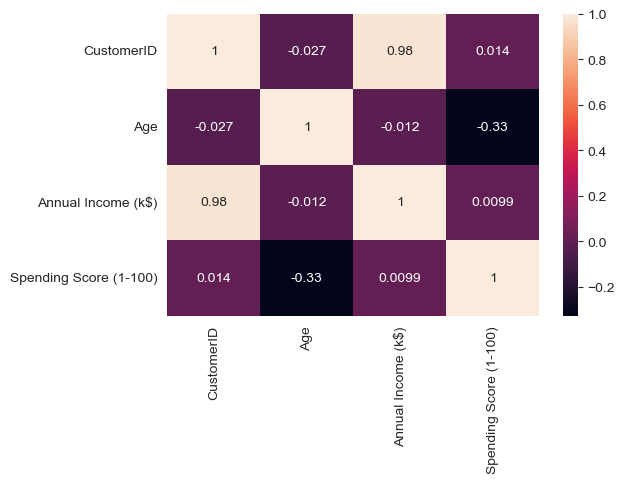

In [13]:
sns.heatmap(df.corr(),annot= True)

-- according to this visulation there is strong cor between cust Id annual income
-- Bec dataframe has sorted. So when id increase annual income also increase normaly not true
-- Normally we must drop Id columns but in the project we saw that we are sharing our data according to project info
-- so in here we dont need to drop id bec we didnt used it in cluttering 

In [14]:
df[["CustomerID","Annual Income (k$)"]]

,CustomerID,Annual Income (k$)
0,1,15
1,2,15
2,3,16
3,4,16
4,5,17
...,...,...
195,196,120
196,197,126
197,198,126
198,199,137


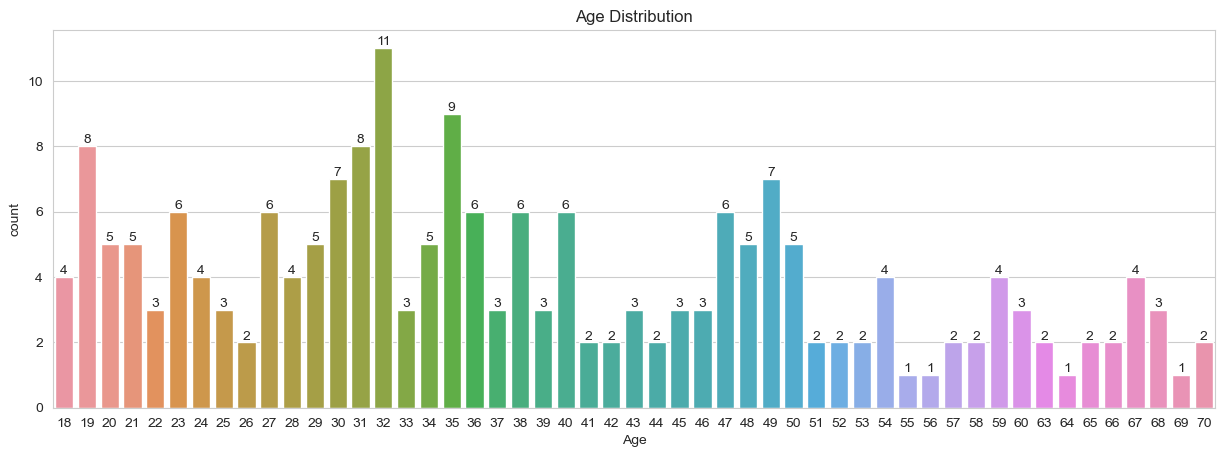

In [15]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x ='Age', data = df)
plt.title('Age Distribution')
plt.xlabel('Age')
ax.bar_label(ax.containers[0]);

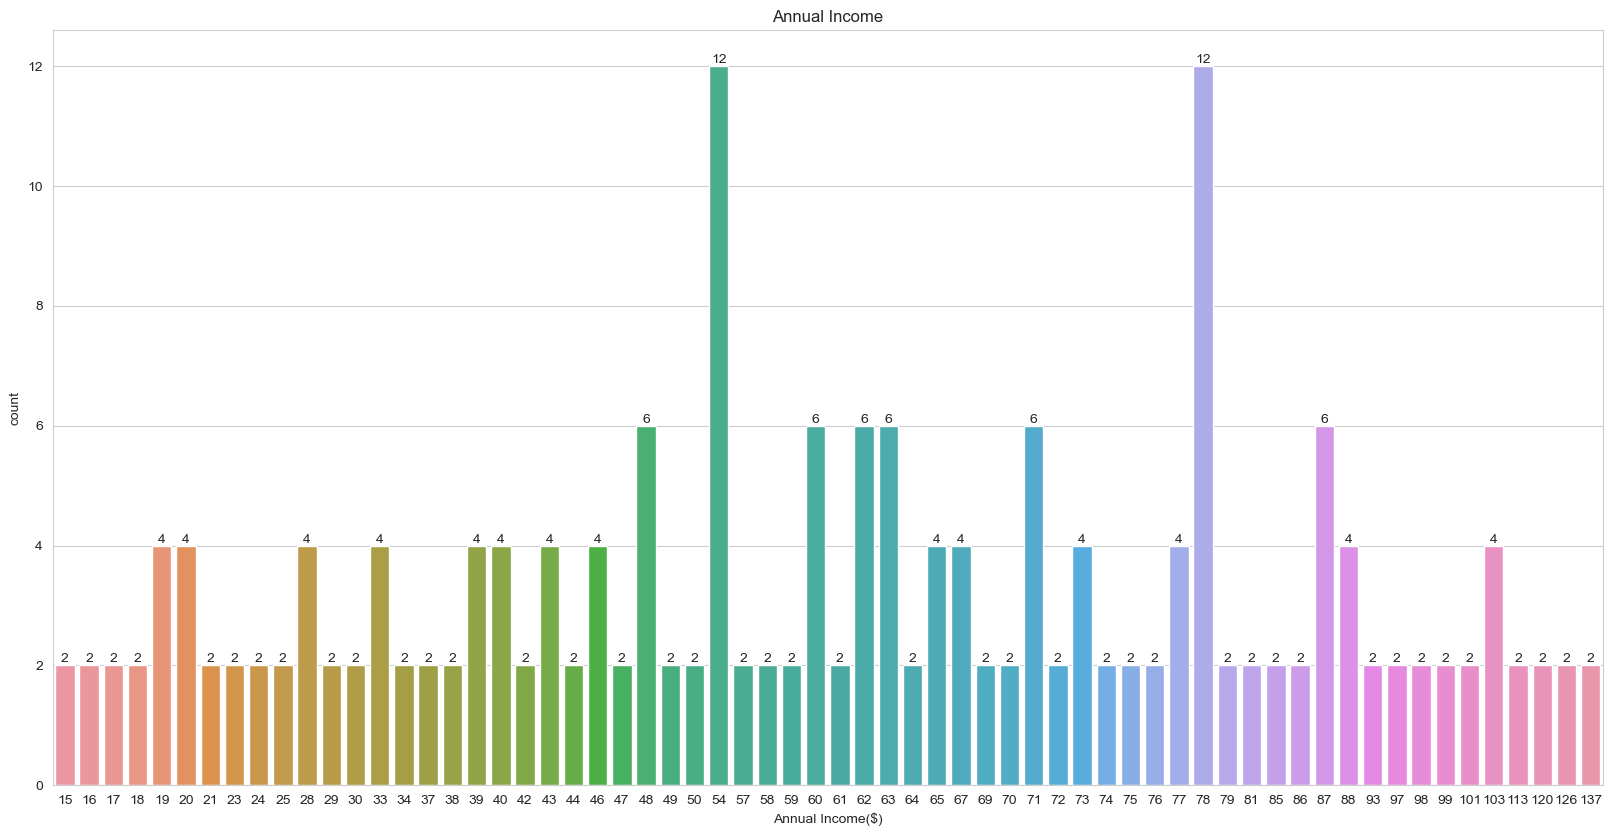

In [16]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Annual Income (k$)', data=df)
plt.title('Annual Income')
plt.xlabel('Annual Income($)')
ax.bar_label(ax.containers[0]);

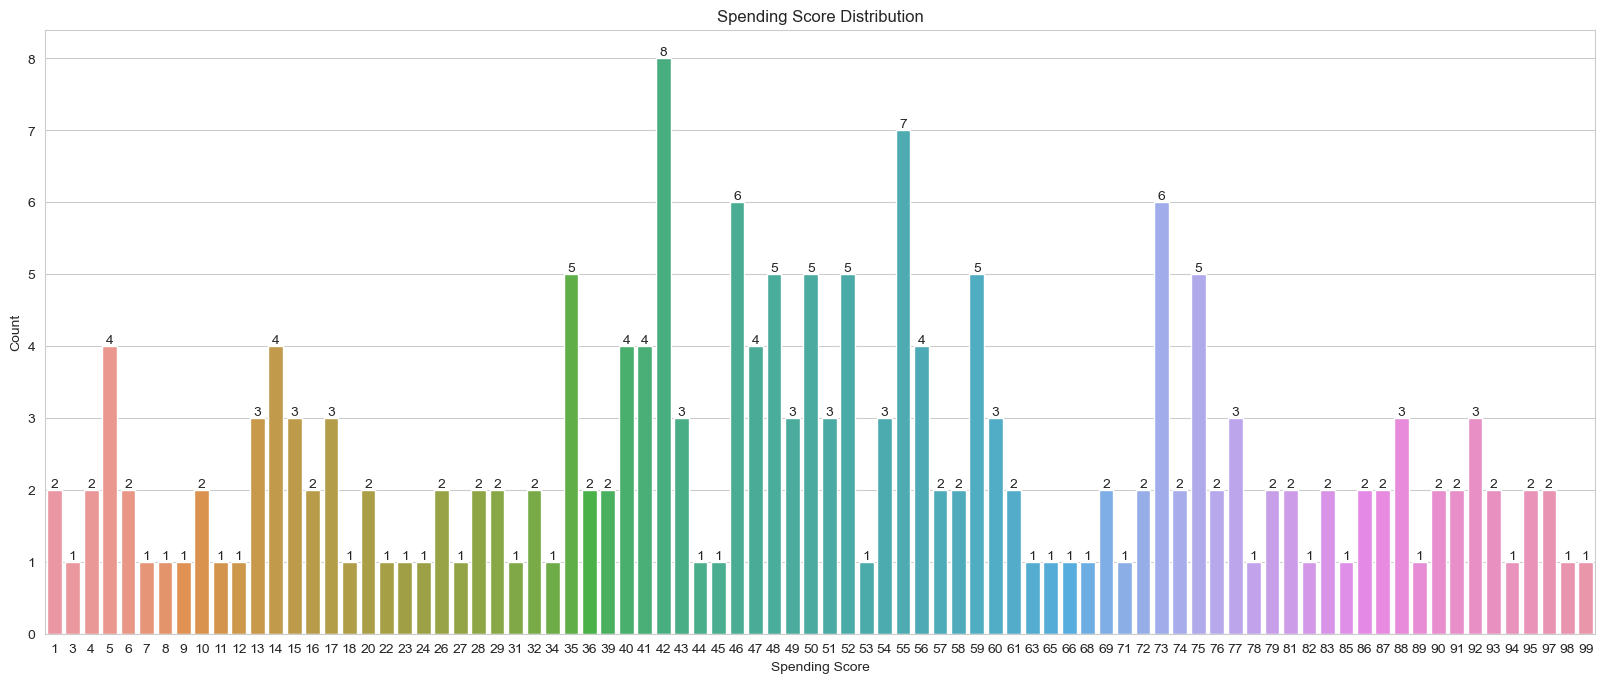

In [17]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x='Spending Score (1-100)', data=df)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);

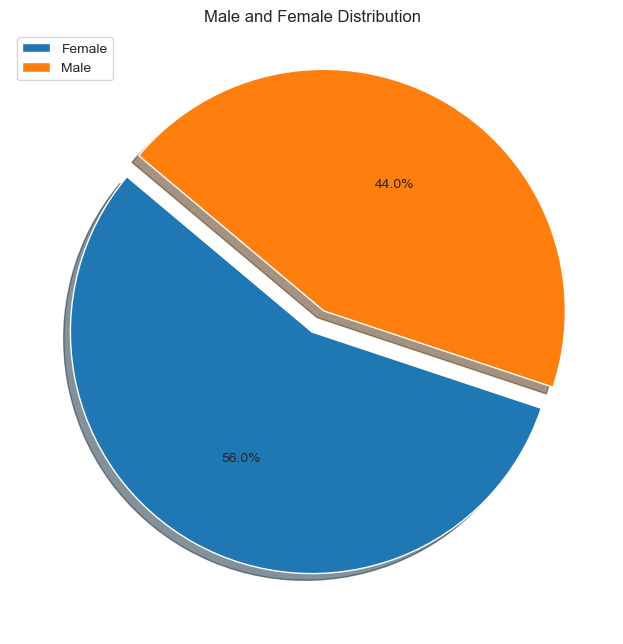

In [18]:
plt.figure(figsize=(8,8))

explode = [0, 0.1]
plt.pie(df['Gender'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True,startangle=140)
plt.legend(labels=['Female','Male'])
plt.title('Male and Female Distribution')
plt.axis('off');

-- we did this bec we wanted to show dataframe has sorted

In [19]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


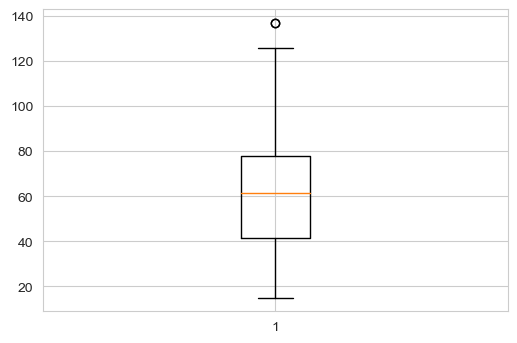

In [20]:
plt.boxplot(df["Annual Income (k$)"], whis=1.5)

plt.show()

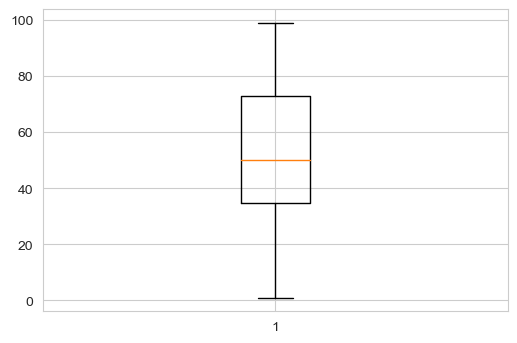

In [21]:
plt.boxplot(df["Spending Score (1-100)"], whis=1.5)

plt.show()

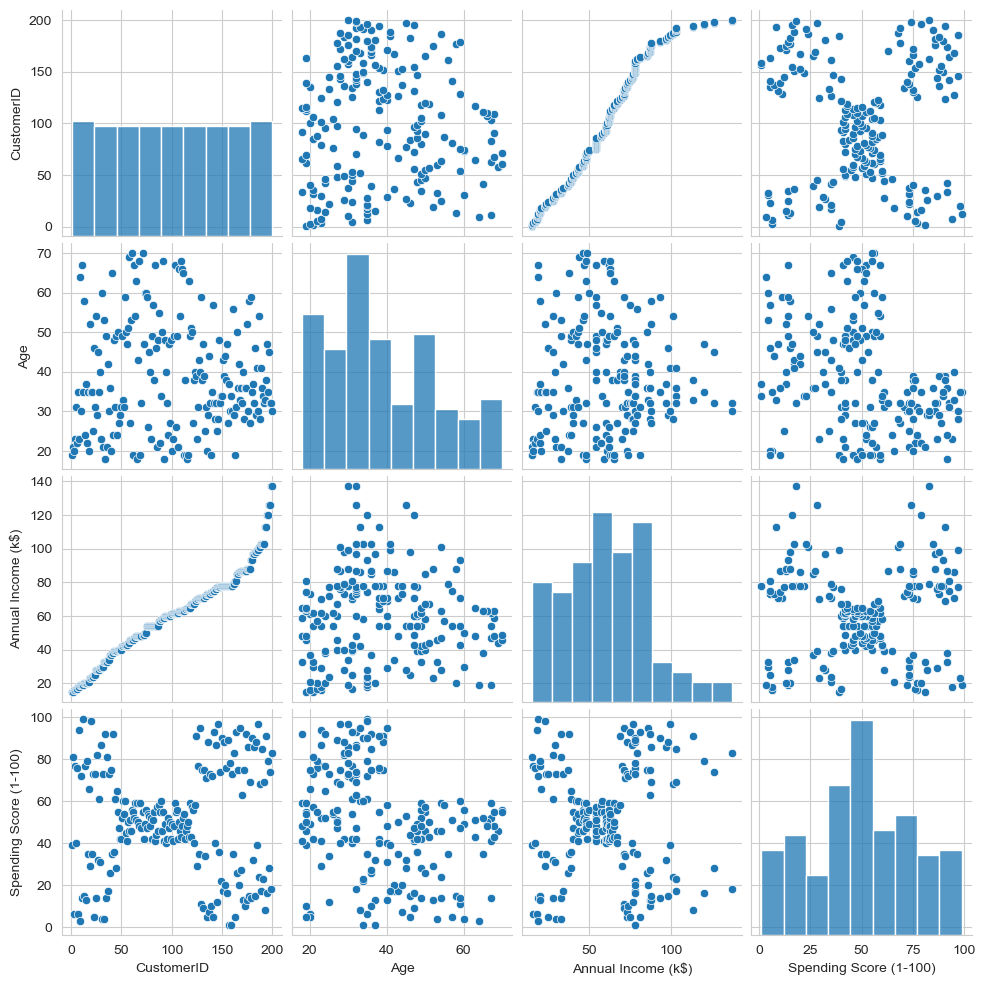

In [22]:
sns.pairplot(df)
plt.show()

--1. On the pair plot we saw that there is lineer relation between Anual income and Customer ID
--2. It seems that there is clustering between spending Score and Custemer Id, It could be work on it.
--3.Same it could be a connection of cluestering between anual and spending Score.
We will see

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

In [23]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### Clustering based on Age and Spending Score

In [24]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.cluster import KMeans

#### *i. Create a new dataset with two variables of your choice*

--  X is a new data set which has 2 variables like Age and spending score
-- X is our neew dataframe

In [25]:
from pyclustertend import hopkins

In [26]:
df1= df.drop(columns="Gender")  
hopkins(df1, df1.shape[0])

0.15962000574839455

In [27]:
X= df[["Age","Spending Score (1-100)"]]

In [28]:
hopkins(X, X.shape[0])

0.28421209980093176

-- after we arranged our model we said how our model will work
-- We define our algorithm of our model

In [29]:
K_means_model = KMeans( random_state=42)

-- our data is educated means fit and we  wanted to predict it according to education :)

In [30]:
K_means_model.fit_predict(X) 

array([7, 0, 6, 0, 7, 0, 6, 3, 5, 0, 5, 3, 5, 0, 6, 0, 1, 0, 1, 3, 1, 0,
       5, 0, 5, 3, 1, 0, 1, 3, 5, 0, 5, 3, 5, 0, 5, 0, 1, 0, 2, 3, 1, 0,
       1, 0, 4, 7, 7, 7, 4, 0, 7, 2, 4, 4, 4, 2, 7, 4, 2, 7, 2, 4, 2, 7,
       4, 2, 7, 7, 2, 4, 2, 2, 2, 7, 4, 4, 7, 4, 2, 4, 2, 4, 7, 4, 4, 7,
       0, 4, 2, 7, 4, 1, 7, 7, 4, 7, 4, 7, 7, 4, 2, 7, 4, 7, 2, 4, 2, 2,
       2, 7, 1, 7, 7, 7, 2, 4, 4, 4, 7, 1, 4, 3, 1, 0, 1, 3, 5, 0, 5, 0,
       7, 0, 6, 3, 5, 0, 6, 0, 5, 3, 7, 3, 6, 3, 1, 0, 1, 3, 5, 3, 5, 0,
       5, 3, 6, 0, 6, 0, 1, 3, 6, 3, 1, 0, 1, 3, 1, 0, 6, 0, 6, 3, 5, 3,
       5, 0, 5, 3, 1, 3, 5, 3, 1, 3, 5, 0, 5, 3, 1, 0, 6, 3, 5, 0, 1, 0,
       6, 3])

-- X is an array so it doesnt work properly 

In [31]:
X= pd.DataFrame(X)

-- we create a model 
- scoring of this we assigned clasess

In [32]:
X

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [33]:
X["Cluster"]= pd.DataFrame(K_means_model.labels_)

In [34]:
X[X["Cluster"] == 1]

,Age,Spending Score (1-100),Cluster
16,35,35,1
18,52,29,1
20,35,35,1
26,45,32,1
28,40,31,1
38,36,26,1
42,48,36,1
44,49,28,1
93,40,40,1
112,38,42,1


In [35]:
X.drop("Cluster",axis=1, inplace=True)

-- In here 8 segment we see. 

#### *ii. Determine optimal number of clusters*

In [36]:
X.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


### Elbow 

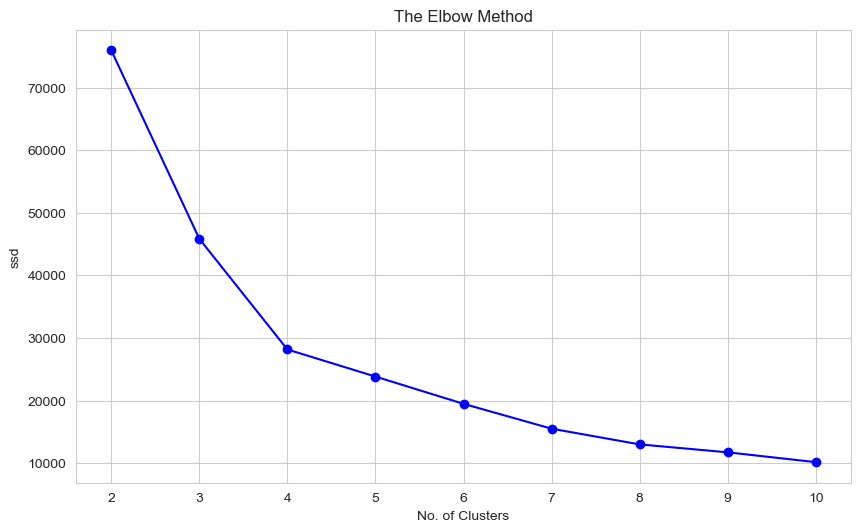

In [37]:
from sklearn.cluster import KMeans

ssd =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n,random_state=42)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo-")
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('ssd')
plt.show()

In [38]:
ssd

[75949.15601023017,
 45840.67661610868,
 28165.583566629342,
 23838.24882164619,
 19483.1179104427,
 15514.193134351031,
 13006.483628851023,
 11738.020296954506,
 10173.039478114479]

-- We let to work elbow randomly to show us what is our k value.

-- Hopkins show us is our data suits clustering or not
-- And if hopkins values is less than 0.5 it means it is good to make clsutering with this data.
-- our data is 0.17 is ok for clsutering.

-- How could be our clasturing it shows us our N value of clester

--  Acording to graph we know that elbow show us N cluster number based on ecluid metrics.
-- Elbow graph when it going down we ll chose not first one we ll chose second big hypotonus of graph.

In [39]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,30108.479394
3,17675.093049
4,4327.334745
5,4355.130911
6,3968.924776
7,2507.709506
8,1268.463332
9,1564.980819


-- one cluster means all values not cluster.
- so  it has NaN

<AxesSubplot:>

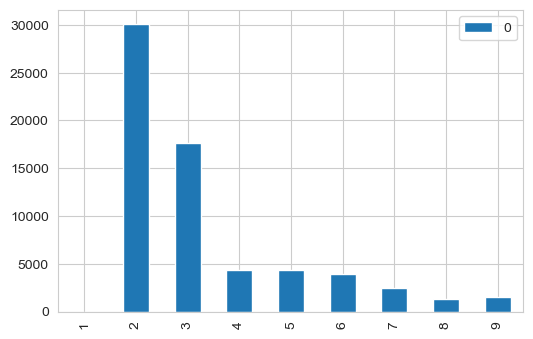

In [40]:
df_diff.plot(kind='bar') 

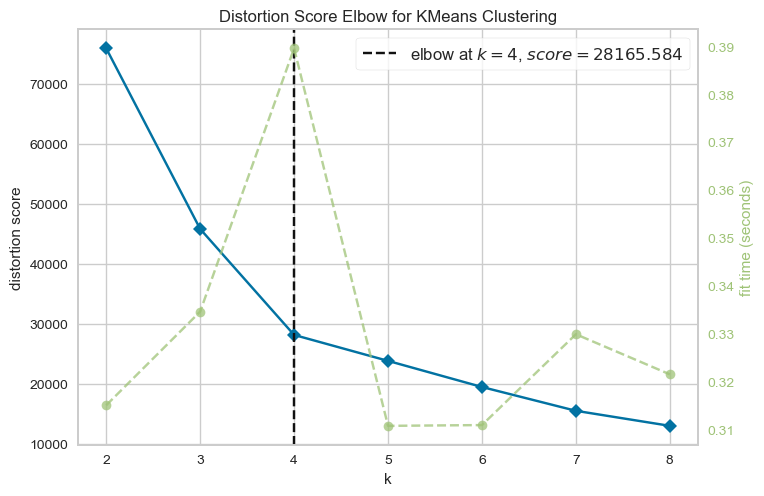

In [41]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

-- According to elbow our clsuter number must be 4 so we wll make our research with this.
-- 4 is our best cluster number

### Why silhouette_score is negative?

In [42]:
from sklearn.metrics import silhouette_score

In [43]:
silhouette_score(X, K_means_model.labels_)

0.43215030177487107

In [44]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107


-- burda domain bilgisi girmeli olmazsa olmaz o yuzden 2 bile olur

silhouette_score = (b-a)/max(a,b)

b : the mean nearest-cluster distance 
a : the mean intra-cluster distance 

for red point, 

b = 1 
a = ((1+1)**0.5 + (1+1)**0.5)/2  ==> 1.41

silhouette_score = (1-1.41)/1.41 ==> -0.29

Silhouette Coefficient:

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

#### *iii. Apply K Means*

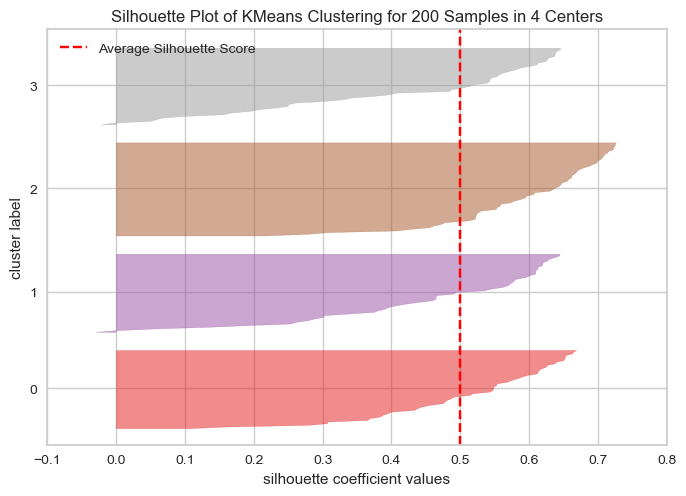

In [45]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

In [46]:
model = KMeans(n_clusters =4, random_state=42)
model.fit_predict(X)

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [47]:
model.inertia_

28165.583566629342

In [48]:
X["Cluster_kmeans"]=model.fit_predict(X) 

In [49]:
X

,Age,Spending Score (1-100),Cluster_kmeans
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3
...,...,...,...
195,35,79,2
196,45,28,1
197,32,74,2
198,32,18,1


--

#### *iv. Visualizing and Labeling All the Clusters*

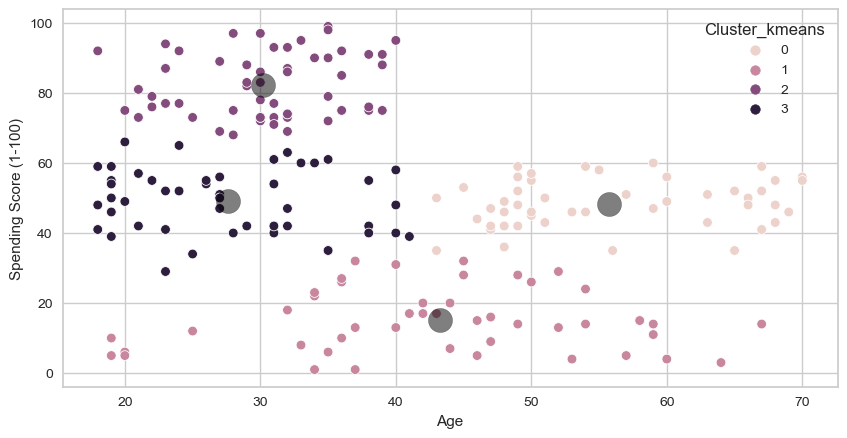

In [50]:
plt.figure(figsize=(10,5))
centers = model.cluster_centers_
sns.scatterplot(df["Age"], 
                df["Spending Score (1-100)"],hue=X['Cluster_kmeans'])
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5);

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [51]:
X1= df[["Annual Income (k$)","Spending Score (1-100)"]]

In [52]:
hopkins(X1, X1.shape[0])

0.2995757838313072

#### *ii. Determine optimal number of clusters*

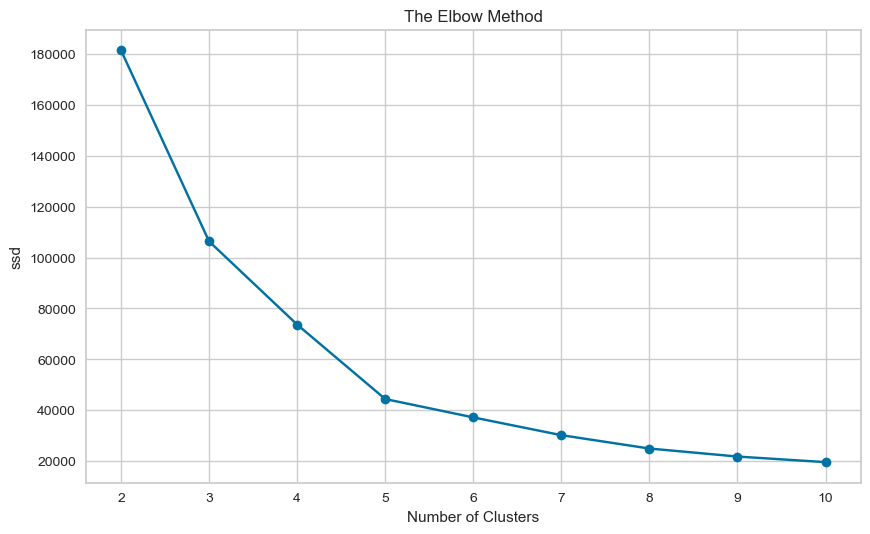

In [53]:
ssd =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X1)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo-")
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('ssd')
plt.show()

In [54]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,75015.222897
3,32668.584023
4,29231.333592
5,7214.640937
6,6974.157303
7,5247.817858
8,3149.746677
9,2190.019823


<AxesSubplot:>

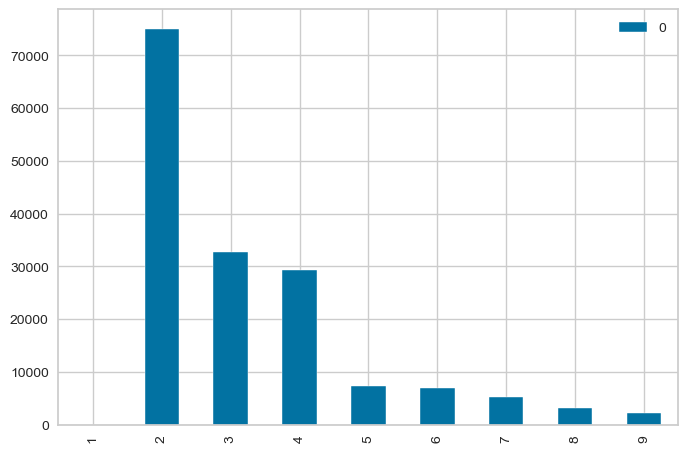

In [55]:
df_diff.plot(kind='bar')

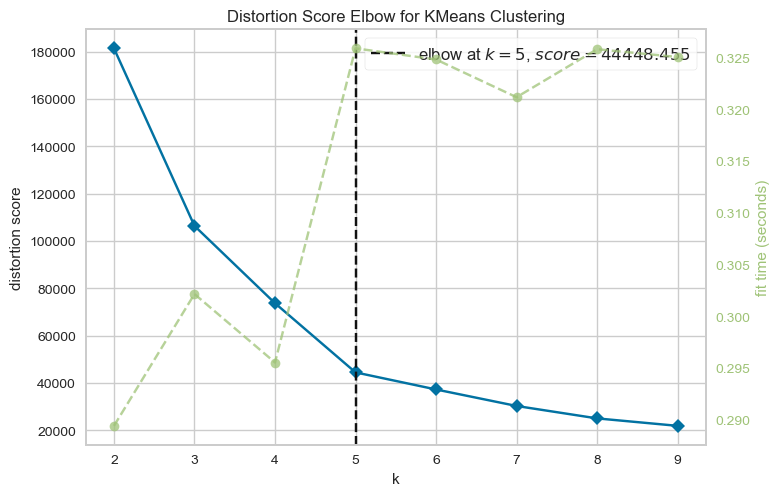

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [56]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X1)
visu.poof()

In [57]:
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113
For n_clusters=9, the silhouette score is 0.4553729779390266
For n_clusters=10, the silhouette score is 0.45925273534781125


In [58]:
K_means_model = KMeans(n_clusters=5, random_state=42)

In [59]:
K_means_model.fit_predict(X1) 

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

#### *iii. Apply K Means*

-- k= 5 applly

In [60]:
K_means_model.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [61]:
X1['Cluster_kmeans'] = K_means_model.fit_predict(X1)
X1

,Annual Income (k$),Spending Score (1-100),Cluster_kmeans
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1


In [62]:
X1['Cluster_kmeans'].value_counts()
# each cluster increase how may data

0    81
4    39
1    35
2    23
3    22
Name: Cluster_kmeans, dtype: int64

#### *iv. Visualizing and Labeling All the Clusters*

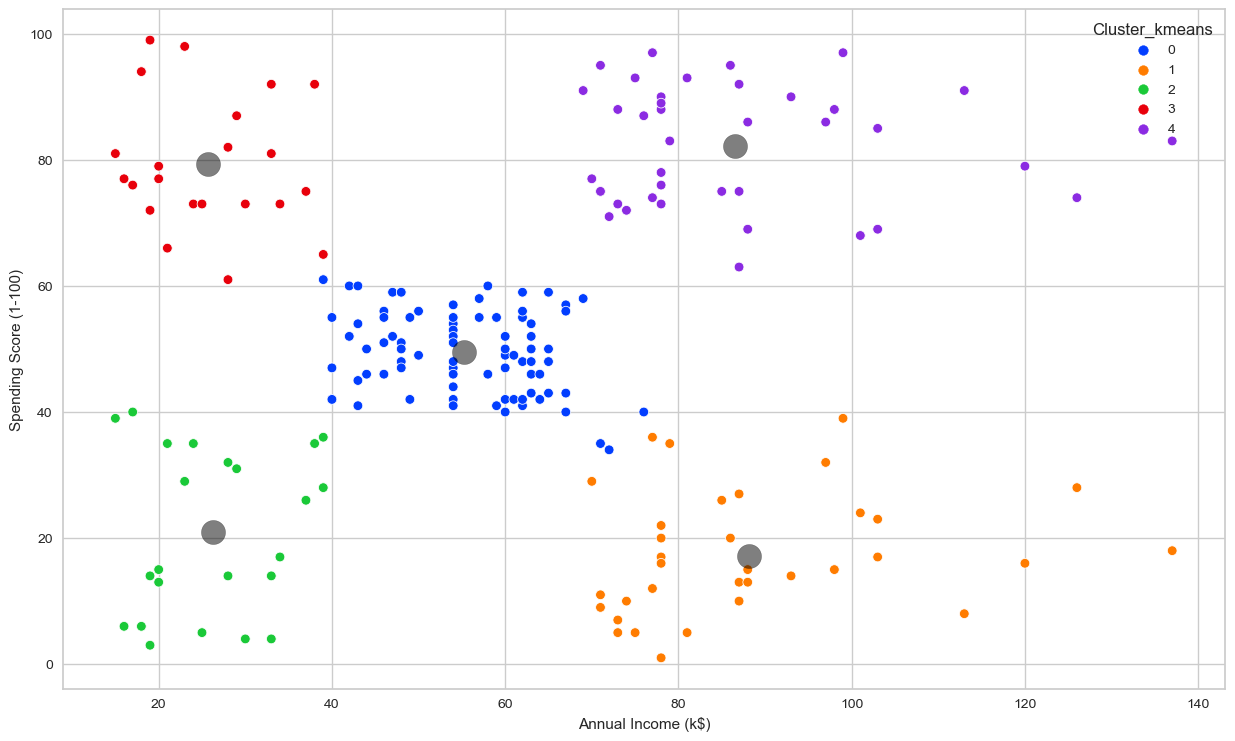

In [63]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_kmeans', data=X1, palette="bright")
centers =K_means_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5)

<AxesSubplot:>

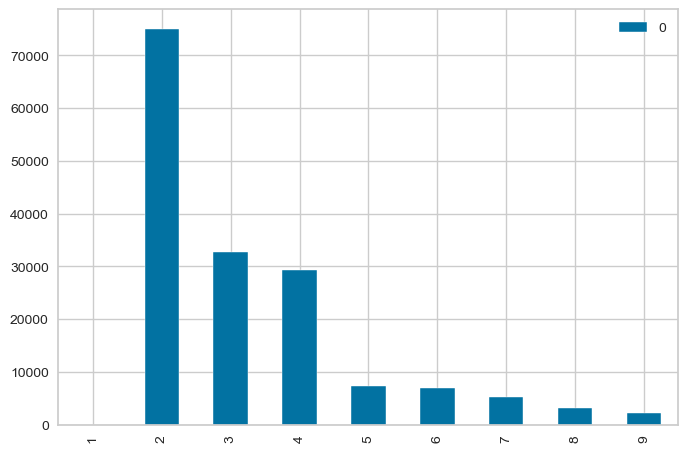

In [64]:
df_diff.plot(kind='bar') 

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- X

In [65]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [66]:
hc_ward = linkage(y = X, method = "ward")  
hc_complete = linkage(X, "complete")      
hc_average = linkage(X, "average")         
hc_single = linkage(X, "single") 

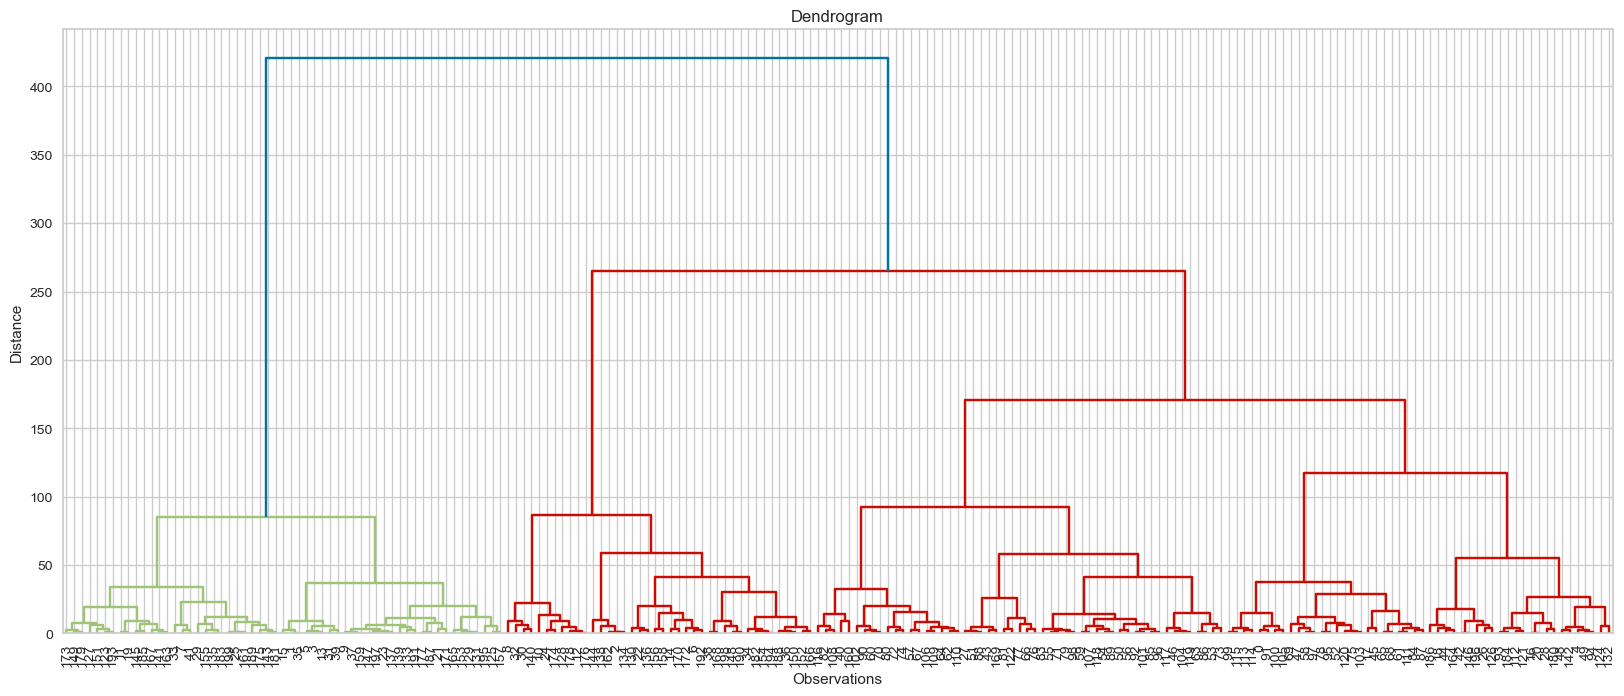

In [67]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);   

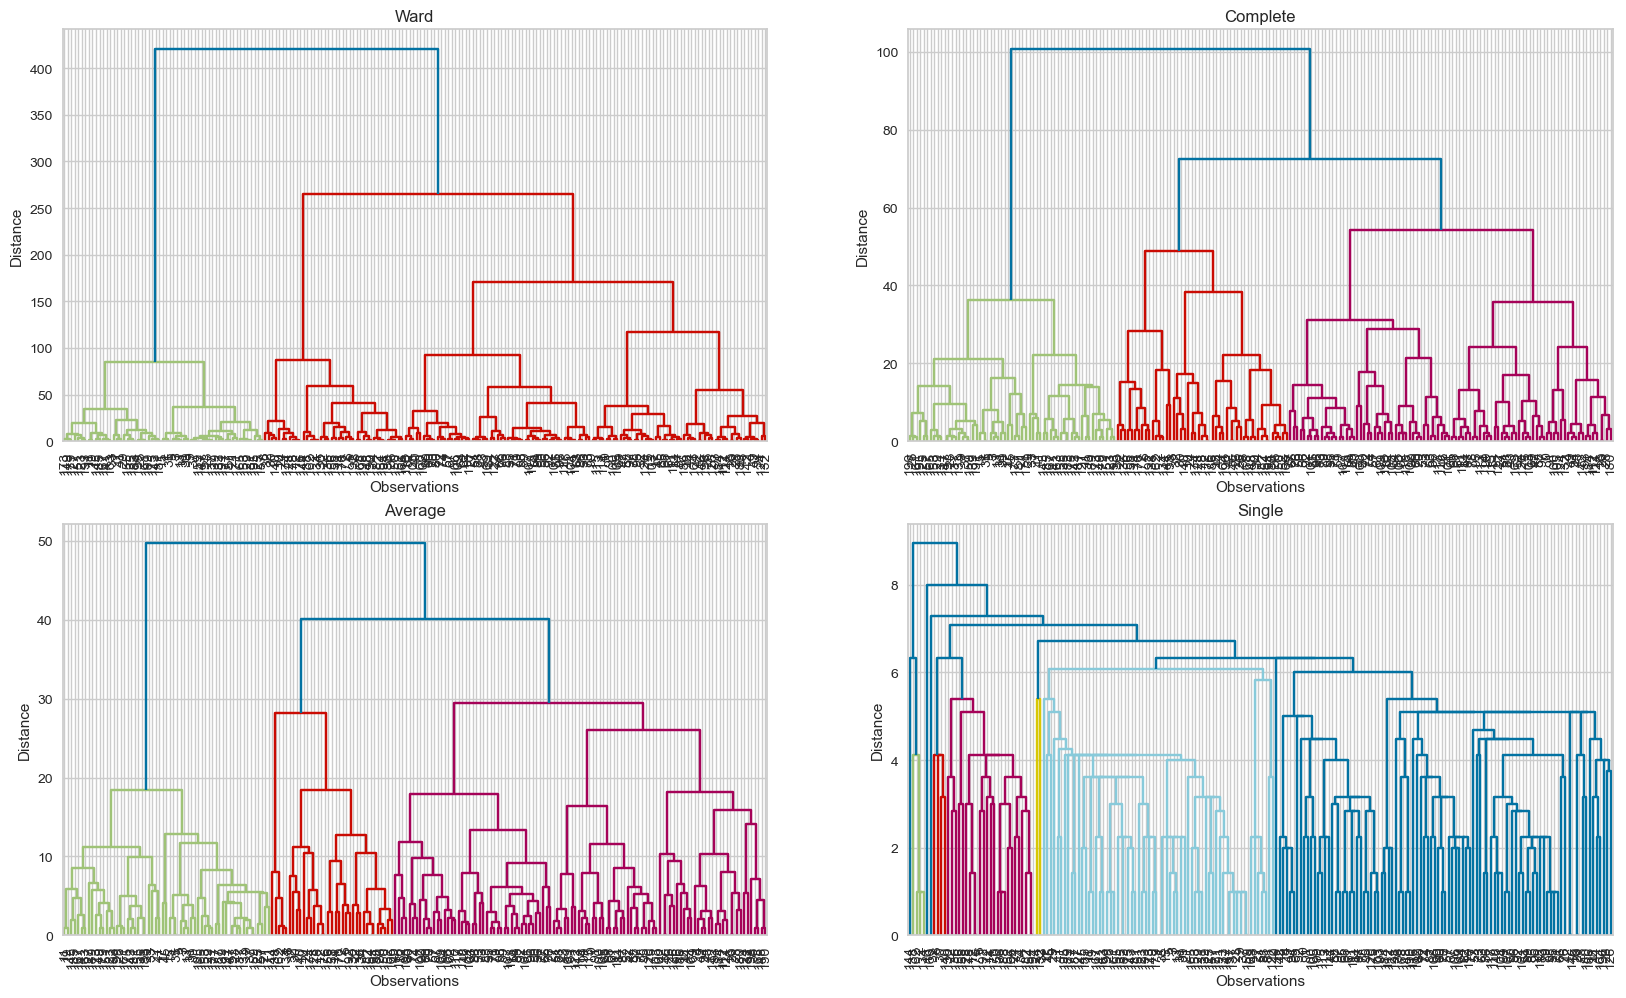

In [68]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

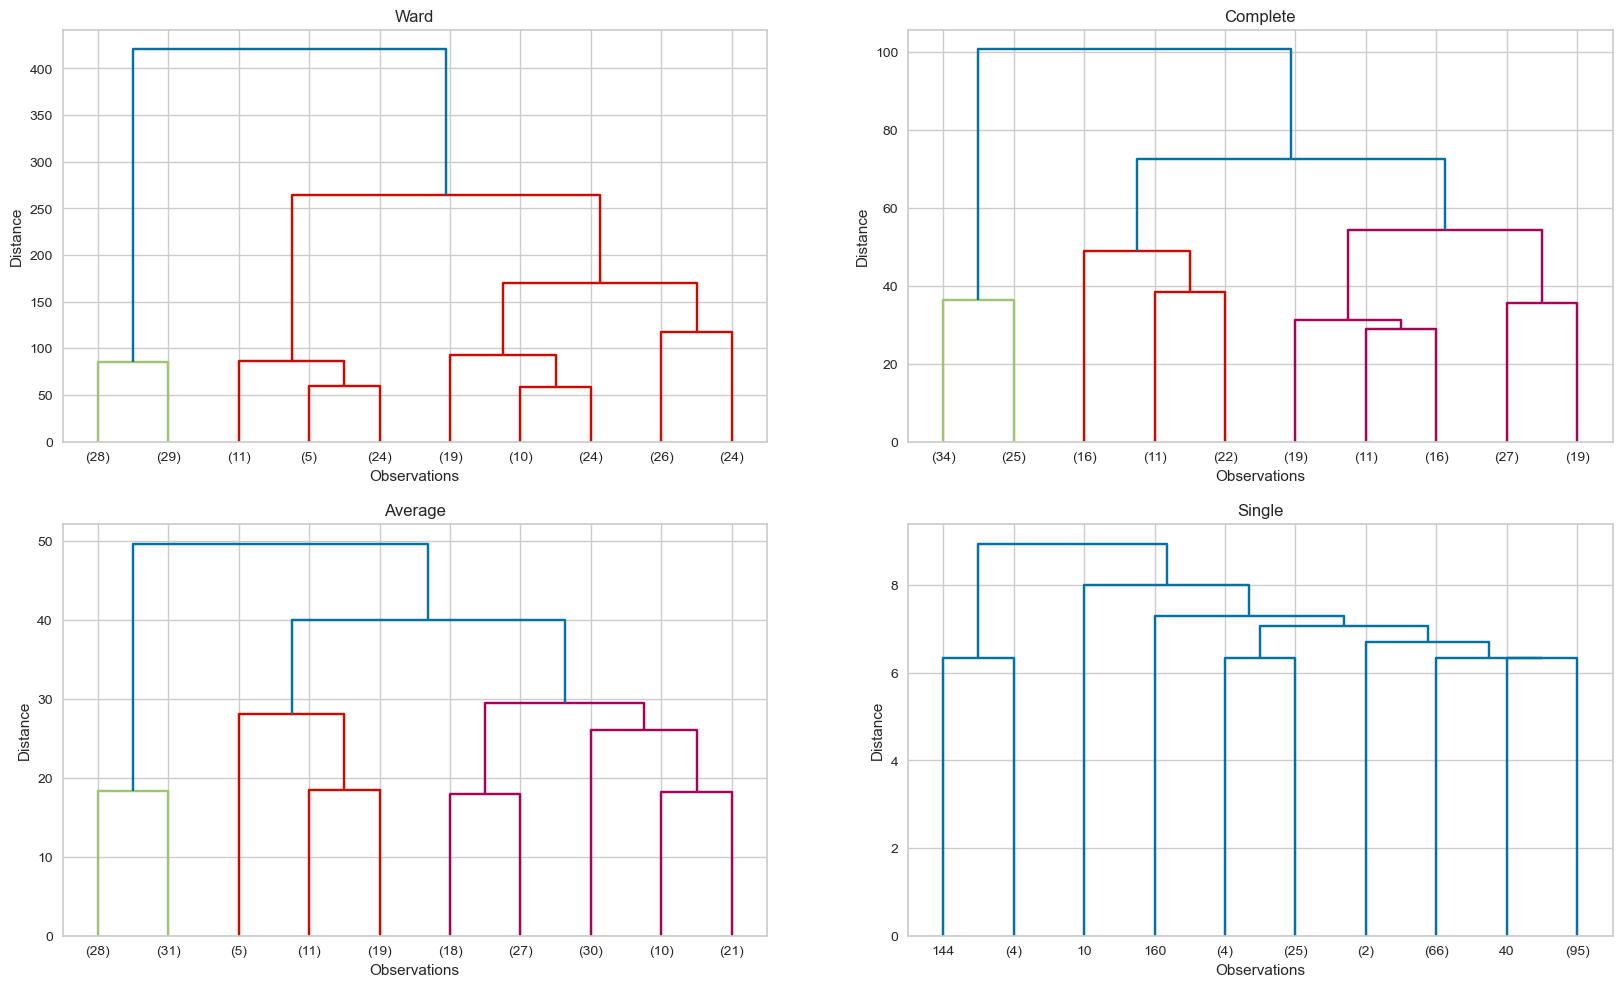

In [69]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)   # leaf_font_size --> X eksenindeki yazilari buyutmek icin.

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

***
***

## Clustering based on Annual Income and Spending Score- x1

In [70]:
hc_ward = linkage(y = X1, method = "ward")  
hc_complete = linkage(X1, "complete")      
hc_average = linkage(X1, "average")         
hc_single = linkage(X1, "single") 

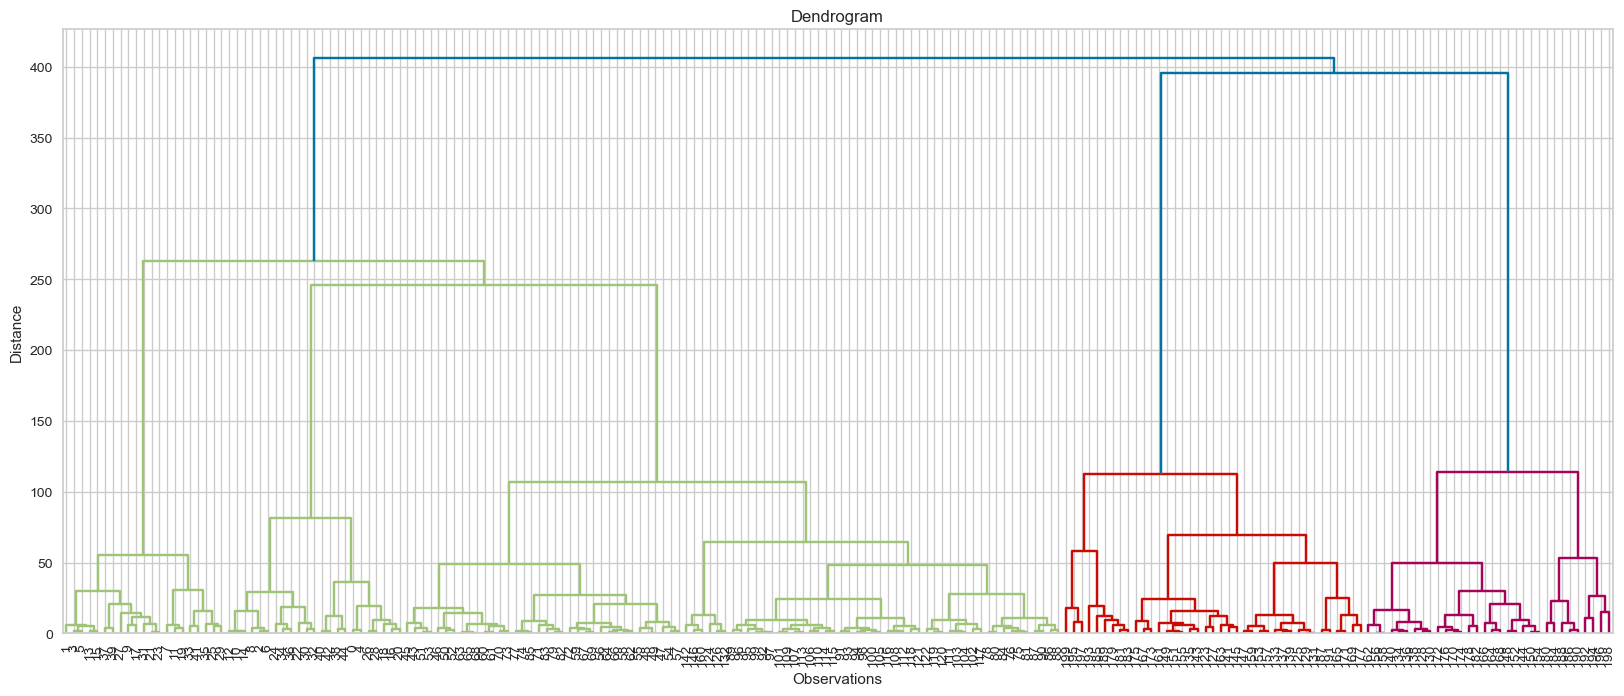

In [71]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10); 

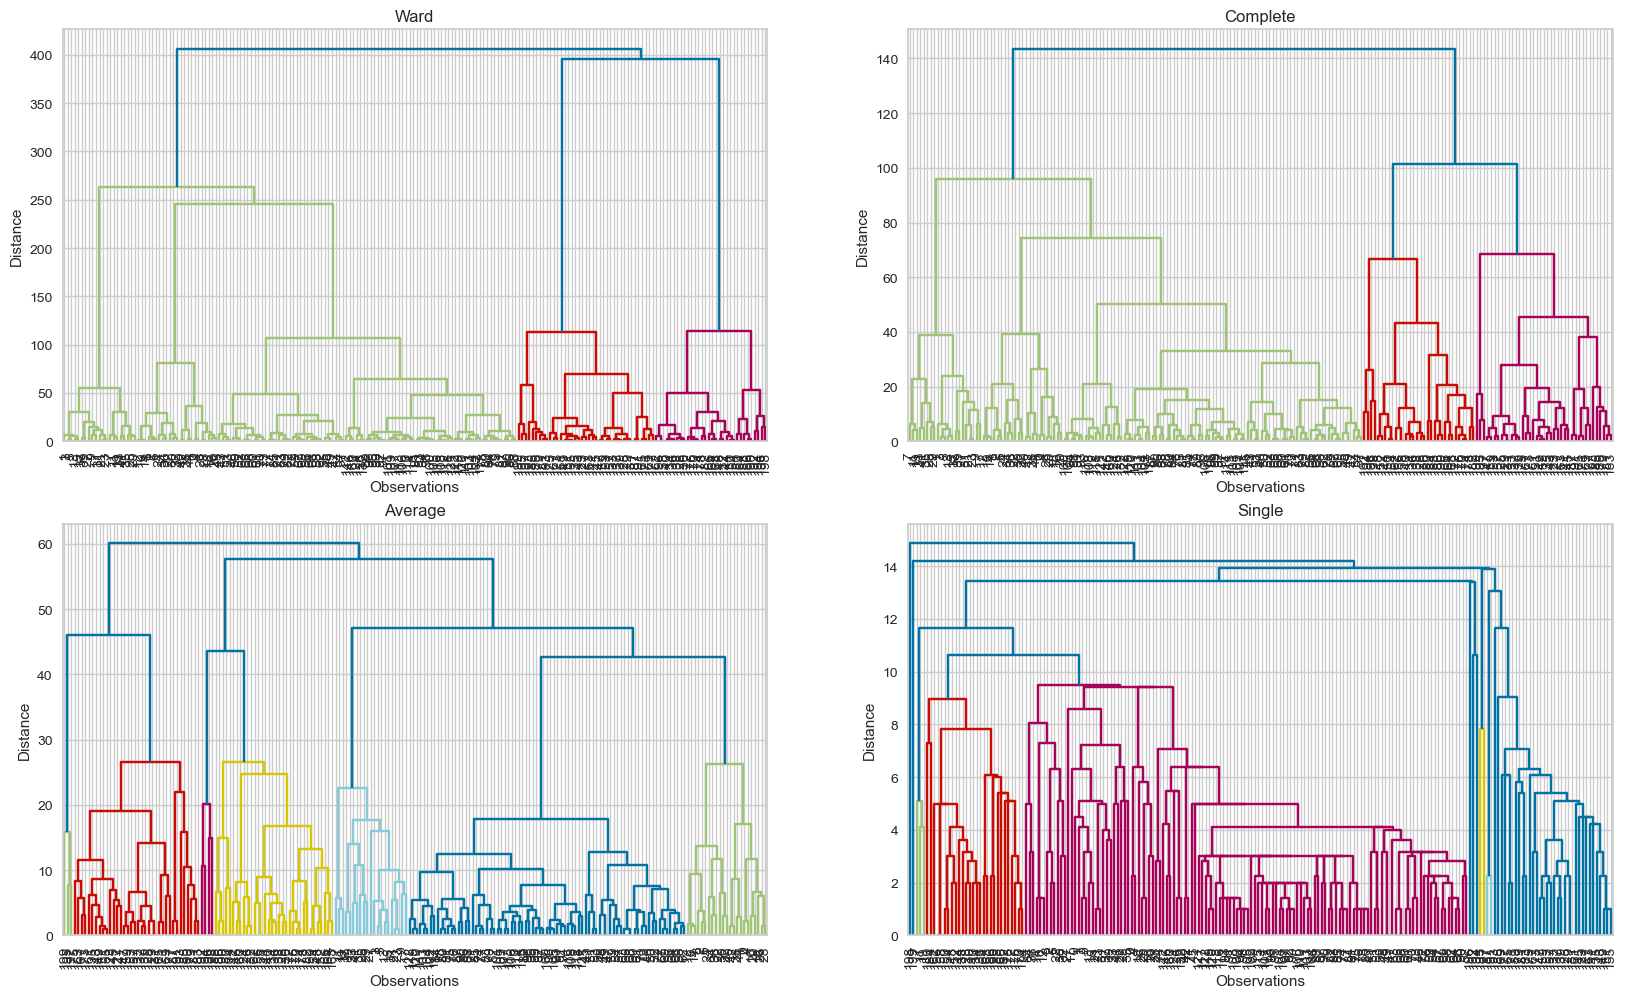

In [72]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

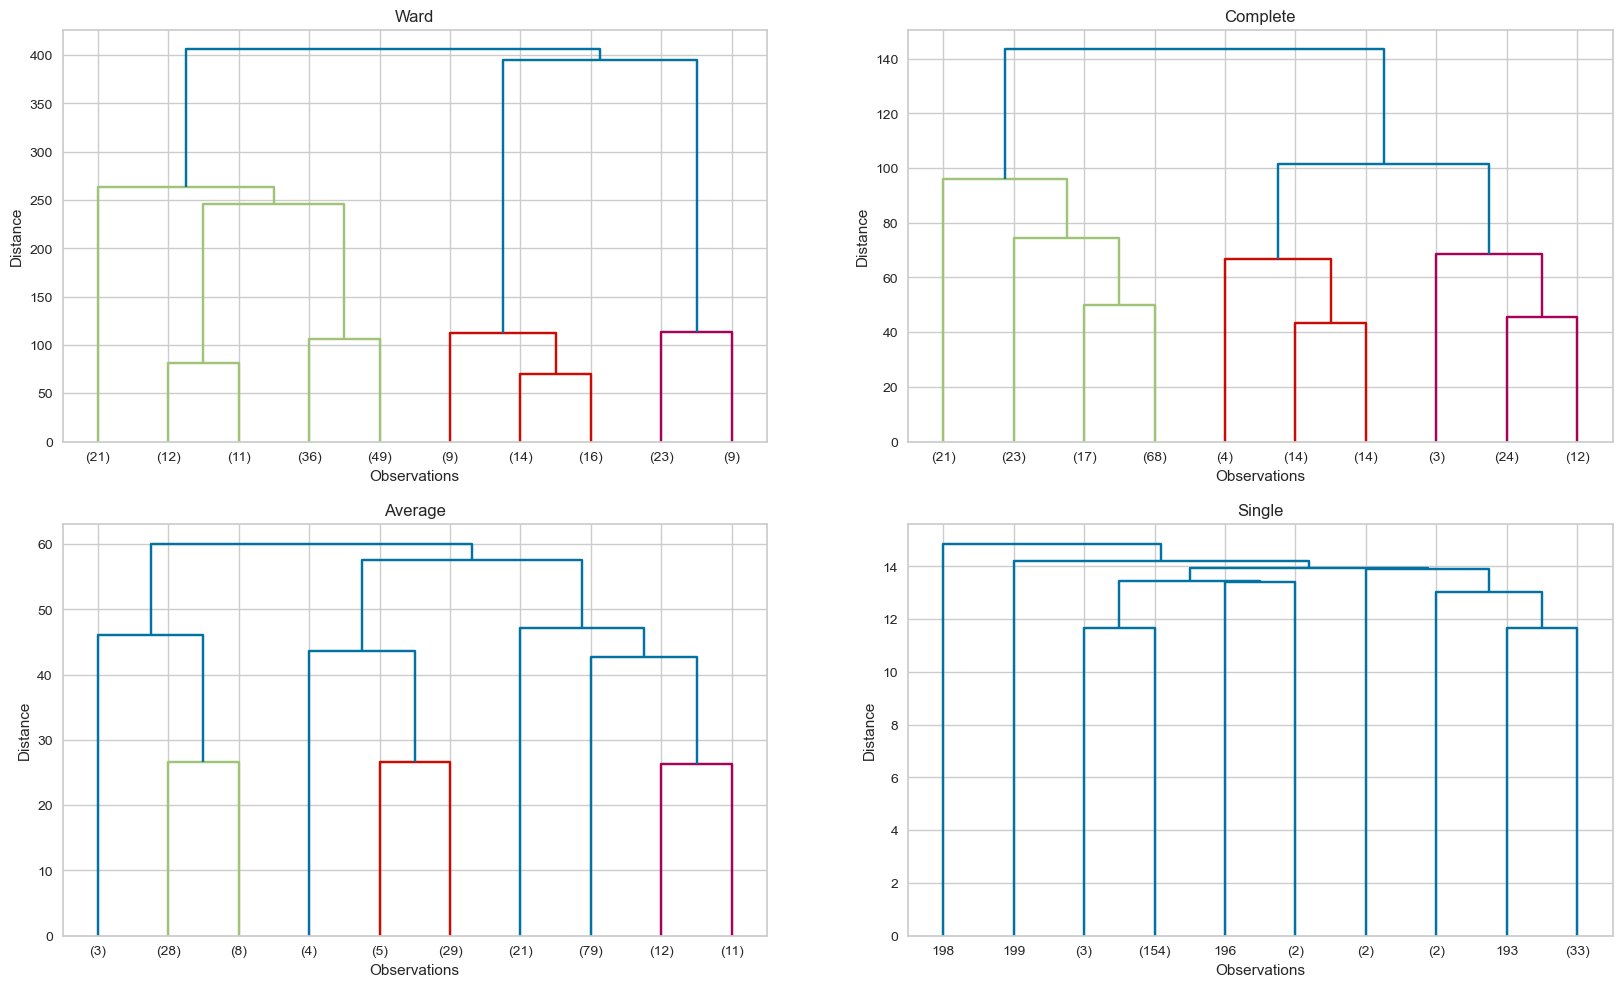

In [73]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)   # leaf_font_size --> X eksenindeki yazilari buyutmek icin.

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- X

In [74]:
from sklearn.cluster import AgglomerativeClustering

In [75]:
X.head()

,Age,Spending Score (1-100),Cluster_kmeans
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3


In [76]:
model = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
clusterX_agg = model.fit_predict(X)
X["clusterX_agg"] = clusterX_agg

In [77]:
X.head()

,Age,Spending Score (1-100),Cluster_kmeans,clusterX_agg
0,19,39,3,0
1,21,81,2,3
2,20,6,1,2
3,23,77,2,3
4,31,40,3,0


#### Annual Income and Spending Score- x1

In [78]:
model = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
clusterX1_agg = model.fit_predict(X1)
X1["clusterX1_agg"] = clusterX1_agg

In [79]:
X1.head()

,Annual Income (k$),Spending Score (1-100),Cluster_kmeans,clusterX1_agg
0,15,39,2,0
1,15,81,3,3
2,16,6,2,0
3,16,77,3,3
4,17,40,2,0


### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- X

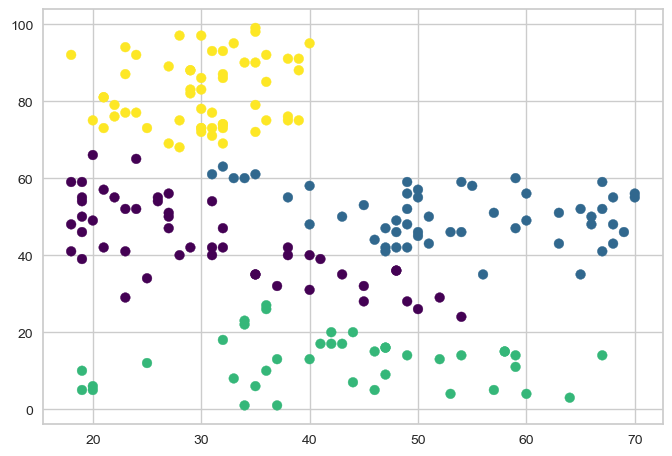

In [80]:
plt.scatter(X["Age"], X["Spending Score (1-100)"], c = clusterX_agg ,cmap = "viridis");

#### Annual Income and Spending Score- x1

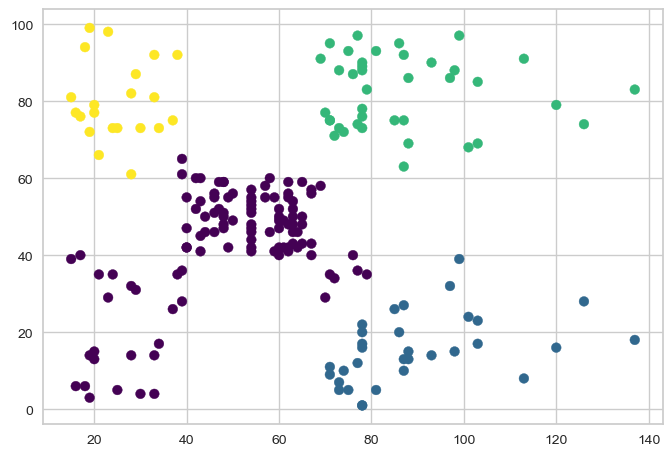

In [81]:
plt.scatter(X1["Annual Income (k$)"],X1["Spending Score (1-100)"], c = clusterX1_agg, cmap = "viridis");

#### Interpretation based on Age and Spending Score- X

In [82]:
X.head()

,Age,Spending Score (1-100),Cluster_kmeans,clusterX_agg
0,19,39,3,0
1,21,81,2,3
2,20,6,1,2
3,23,77,2,3
4,31,40,3,0


In [83]:
df["Age_Spending_Score_cluster"] = X.Cluster_kmeans

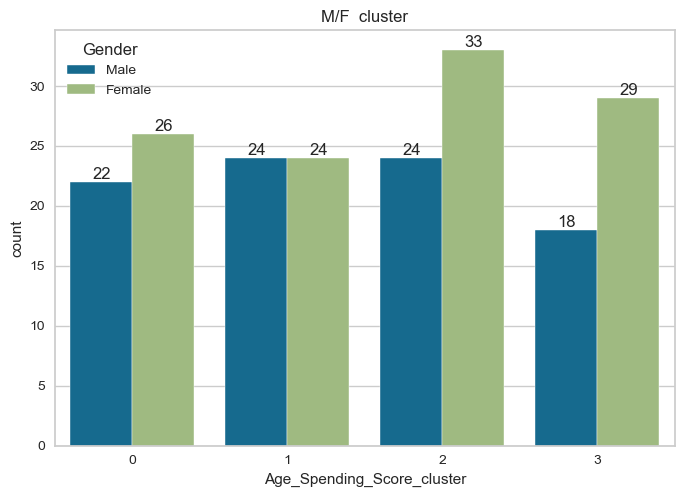

In [84]:
plt.title("M/F  cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df["Age_Spending_Score_cluster"], hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

In [85]:
df.groupby("Age_Spending_Score_cluster").mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Age_Spending_Score_cluster,,,,
0,85.145833,55.708333,54.770833,48.229167
1,115.333333,43.291667,66.937500,15.020833
2,115.157895,30.175439,66.070175,82.350877
3,83.255319,27.617021,53.276596,49.148936


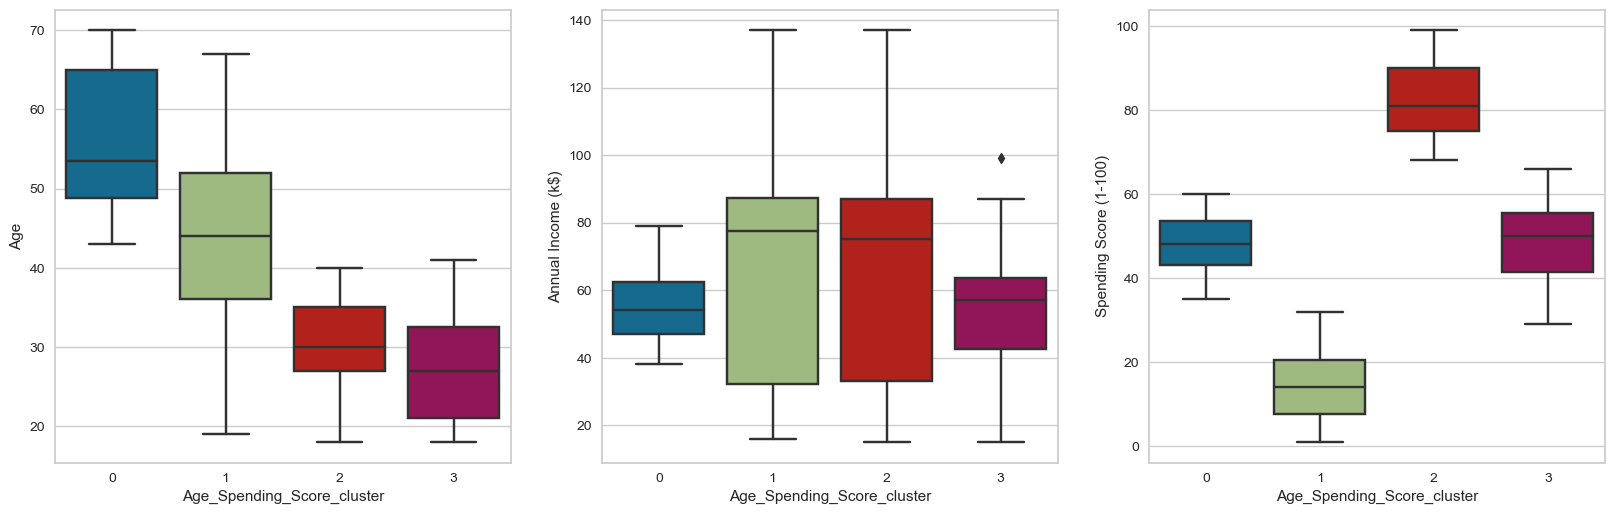

In [86]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "Age", x = "Age_Spending_Score_cluster", data = df)

plt.subplot(132)
sns.boxplot(y = "Annual Income (k$)", x = "Age_Spending_Score_cluster",  data = df)

plt.subplot(133)
sns.boxplot(y = "Spending Score (1-100)", x = "Age_Spending_Score_cluster", data = df);

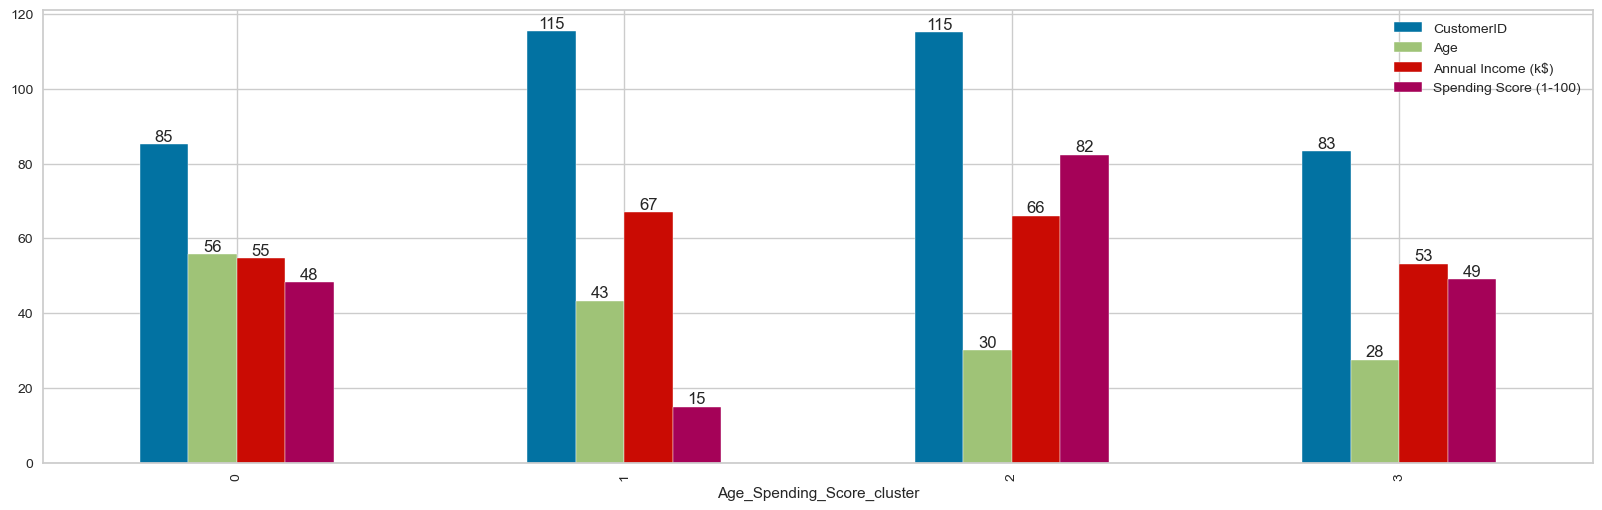

In [87]:
ax = df.groupby("Age_Spending_Score_cluster").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f") 

-- We didnt drop our custemer begining of study because the way on our project not neccesary until here
- But in here we need to drop bec of visulation.
-- we got wrong visulation with customerID

In [88]:
df.drop("CustomerID",axis=1, inplace=True)

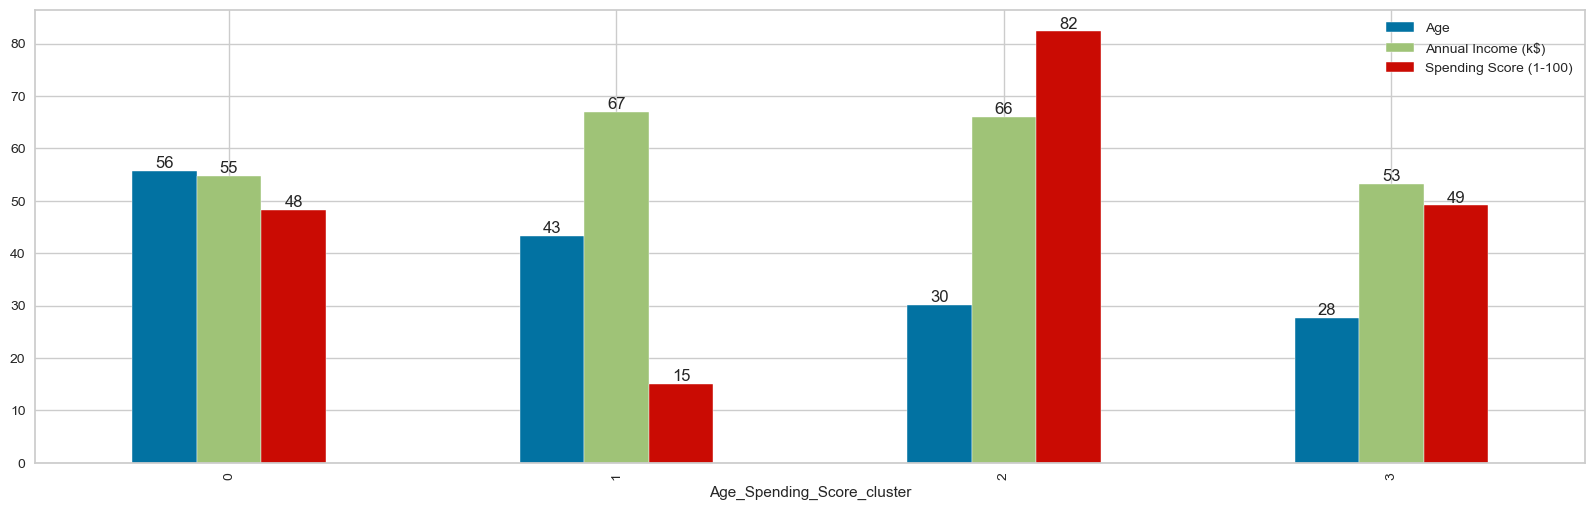

In [89]:
ax = df.groupby("Age_Spending_Score_cluster").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f") 

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x1

In [90]:
X1

,Annual Income (k$),Spending Score (1-100),Cluster_kmeans,clusterX1_agg
0,15,39,2,0
1,15,81,3,3
2,16,6,2,0
3,16,77,3,3
4,17,40,2,0
...,...,...,...,...
195,120,79,4,2
196,126,28,1,1
197,126,74,4,2
198,137,18,1,1


In [91]:
df.drop(columns= "Age_Spending_Score_cluster", axis=1, inplace=True)

In [92]:
df["Annual_Income_Spending_Score_cluster"] = X1.Cluster_kmeans
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual_Income_Spending_Score_cluster
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


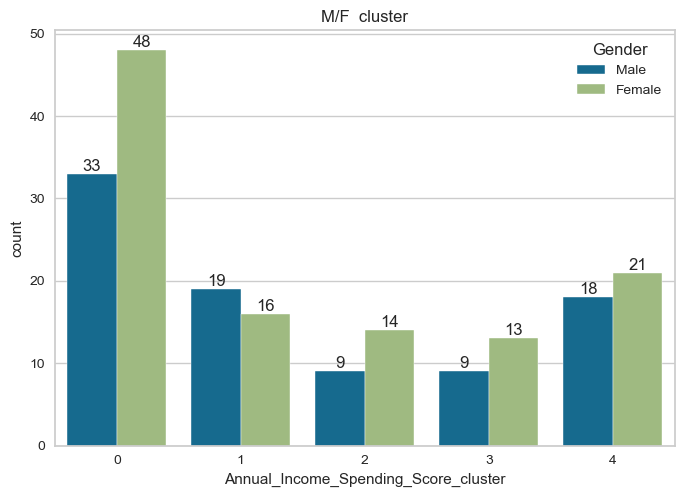

In [93]:
plt.title("M/F  cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df["Annual_Income_Spending_Score_cluster"], hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

In [94]:
df.groupby(["Gender", "Annual_Income_Spending_Score_cluster"]).mean()

Age  Annual Income (k$)  \
Gender Annual_Income_Spending_Score_cluster                                  
Female 0                                     40.895833           55.354167   
       1                                     43.250000           90.937500   
       2                                     43.214286           27.357143   
       3                                     25.461538           25.692308   
       4                                     32.190476           86.047619   
Male   0                                     45.363636           55.212121   
       1                                     39.315789           85.894737   
       2                                     48.333333           24.666667   
       3                                     25.000000           25.777778   
       4                                     33.277778           87.111111   

                                             Spending Score (1-100)  
Gender Annual_Income_Spending_Score_cluster                          
Female 0                                                  49.000000  
       1                                                  22.062500  
       2                                                  21.714286  
       3                                                  80.538462  
       4                                                  81.666667  
Male   0                                                  50.272727  
       1                                                  12.947368  
       2                                                  19.666667  
       3                                                  77.666667  
       4                                                  82.666667

---
---

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

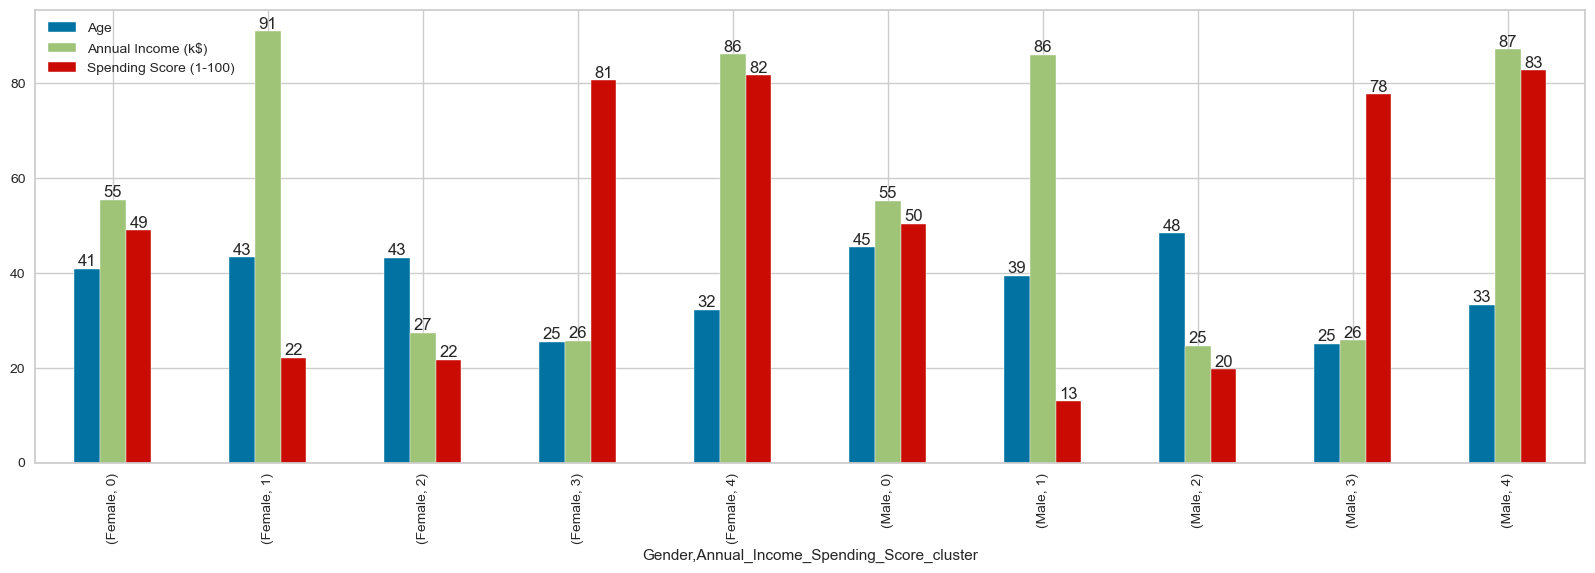

In [95]:
ax = df.groupby(["Gender", "Annual_Income_Spending_Score_cluster"]).mean().plot(kind="bar", figsize=(20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

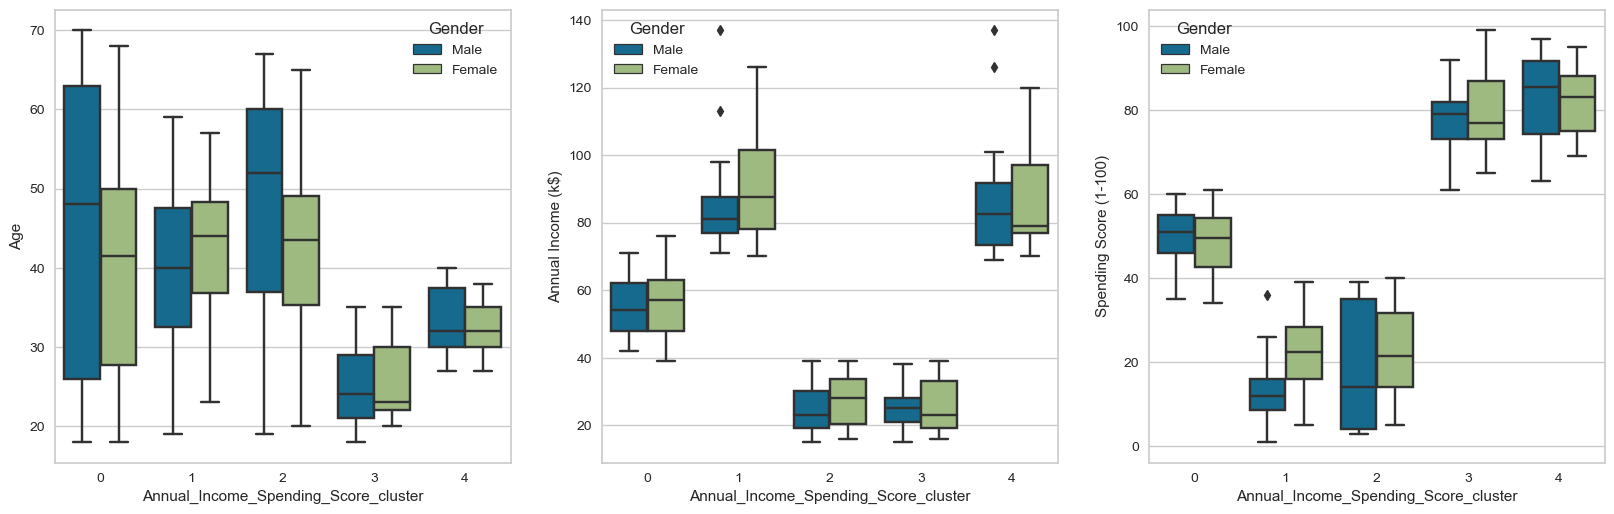

In [96]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "Age", x = "Annual_Income_Spending_Score_cluster", hue= "Gender", data = df)

plt.subplot(132)
sns.boxplot(y = "Annual Income (k$)", x = "Annual_Income_Spending_Score_cluster", hue= "Gender", data = df)

plt.subplot(133)
sns.boxplot(y = "Spending Score (1-100)", x = "Annual_Income_Spending_Score_cluster", hue= "Gender", data = df);

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___